####  Combine 7Twelve Portfolio
* This notebook is used to analyze combined roth acccount in my merrill edge account
(http://appliedvalueinvestor.com/2017/09/10/retirement-portfolio-7twelve/)

In [1]:
### Setup the environment
import os,sys
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime as dt
import matplotlib
import seaborn as sns
#%matplotlib inline
import pylab as py
py.ion()

import scipy as sp
import scipy.optimize as scopt
import scipy.stats as spstats
import warnings
warnings.filterwarnings('ignore')

HOME=os.environ['HOME']
file_path = os.path.dirname(os.path.realpath('__file__'))
sys_path='%s/..'%file_path
sys.path.append(sys_path)
from investmenttools import PortfolioBuilder as PB
reload(PB)

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
## Portfolio ticker
nme=['BIV','DBC','PCY','SHYG','TIP','VAW','VB','VNQ','VEU','VO','VTV','VWO','SHY',\
     'AGG','SCHP','EMB','FREL','IJH','IVV','IEFA','VBR','FMAT','IEMG','FENY']

cc=nme#%list(set.union(set(nme),set(nfe),set(nTD),set(nVa)))
print cc
wme=24*[0.0416]


['BIV', 'DBC', 'PCY', 'SHYG', 'TIP', 'VAW', 'VB', 'VNQ', 'VEU', 'VO', 'VTV', 'VWO', 'SHY', 'AGG', 'SCHP', 'EMB', 'FREL', 'IJH', 'IVV', 'IEFA', 'VBR', 'FMAT', 'IEMG', 'FENY']


In [3]:
## Define python module to download ticker data
from selenium import webdriver
from time import mktime
from xvfbwrapper import Xvfb

def WaitForDownload(datafile):
    bul=0
    while not bul:
        if os.path.isfile(datafile):
            bul=1
        else:
            bul=0

def download_ticker(ticker,sd,ed):
    vdisplay=Xvfb()
    sd_unix=mktime(sd.timetuple())
    ed_unix=mktime(ed.timetuple())
    URL='https://finance.yahoo.com/quote/%s/history?period1=%d&period2=%d&interval=1d&filter=history&frequency=1d'%(ticker.upper(),sd_unix,ed_unix)
    print URL
    #vdisplay.start() ## uncomment to prevent browser window from opening 
    driver=webdriver.Chrome()
    driver.get(URL)
    driver.implicitly_wait(100)
    elem=driver.find_element_by_link_text('Download Data')
    elem.click()
    datafile='%s/Downloads/%s.csv'%(HOME,ticker.upper())
    WaitForDownload(datafile)
    #assert os.path.isfile(datafile)
    mv_cmd='mv %s/Downloads/%s.csv %s/../Data'%(HOME,ticker.upper(),file_path)
    
    os.system(mv_cmd)
    #vdisplay.stop() ## uncomment to prevent browser window from opening 
    driver.close()    
    
## Define python module to read ticker data from csv file downloaed from Yahoo-finance
def get_data_from_csv(filename,ticker):
	data=pd.read_csv(filename)
	data.set_index('Date',inplace=True)
	data.rename(columns={'Close':ticker},inplace=True)
	data=data[ticker]
	return data.astype('float32')

In [7]:
# Download data
## Not running this again, as I already downloaded the data
sd=(2018,1,1)
ed=(2018,1,1)

for s in nme:
    print s
    download_ticker(s.upper(),dt(2018,1,1),dt(2018,6,30))



BIV
https://finance.yahoo.com/quote/BIV/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
DBC
https://finance.yahoo.com/quote/DBC/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
PCY
https://finance.yahoo.com/quote/PCY/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
SHYG
https://finance.yahoo.com/quote/SHYG/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
TIP
https://finance.yahoo.com/quote/TIP/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
VAW
https://finance.yahoo.com/quote/VAW/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
VB
https://finance.yahoo.com/quote/VB/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequency=1d
VNQ
https://finance.yahoo.com/quote/VNQ/history?period1=1514793600&period2=1530342000&interval=1d&filter=history&frequ

In [16]:
#Collate portfolio data
data_me={}


for s in nme:
    data_me[s]=get_data_from_csv('%s/../Data/%s.csv'%(file_path,s.upper()),s)
portfolio_me=pd.DataFrame(data_me.values()).T  
portfolio_me.dropna(inplace=True)
portfolio_me.index=pd.to_datetime(portfolio_me.index)


print portfolio_me.head(5)
print wme

              PCY   IEMG     EMB  ...      VWO     IJH   FENY
Date                              ...                        
2018-01-02  29.63  58.00  116.40  ...    46.70  191.57  20.39
2018-01-03  29.61  58.51  116.35  ...    47.15  191.92  20.69
2018-01-04  29.64  58.75  116.65  ...    47.44  192.47  20.82
2018-01-05  29.67  59.25  116.72  ...    47.86  193.22  20.79
2018-01-08  29.71  59.29  116.51  ...    47.87  194.18  20.92

[5 rows x 24 columns]
[0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416, 0.0416]


TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [0] of <type 'int'>

In [17]:
## Compute Portfolio Variance

sme=PB.calc_portfolio_var(portfolio_me,wme)
print 'Var fo me:',sme


Var fo me: 2.202017597324847


In [18]:
## Compute Portfolio returns with annual rebalancing
rme=PB.Backtest_Annual_Rebalance(nme,wme,dt(2018,1,1),dt(2018,6,30),initial=10000,stk_data=portfolio_me)


In [19]:
## Compute Annual Returns

Pme_dp=PB.calc_daily_returns(rme[['Total','Cash']].sum(axis=1))
Pme_ap=100*PB.calc_annual_returns(Pme_dp)
Pme_ap.name='me'
Annual_Returns=pd.concat([Pme_ap],axis=1)
print Annual_Returns

print '\n Average Annual Returns:'
avg_annual_returns=Annual_Returns.mean(axis=0)
print avg_annual_returns

         me
2018 -1.994

 Average Annual Returns:
me   -1.994
dtype: float64


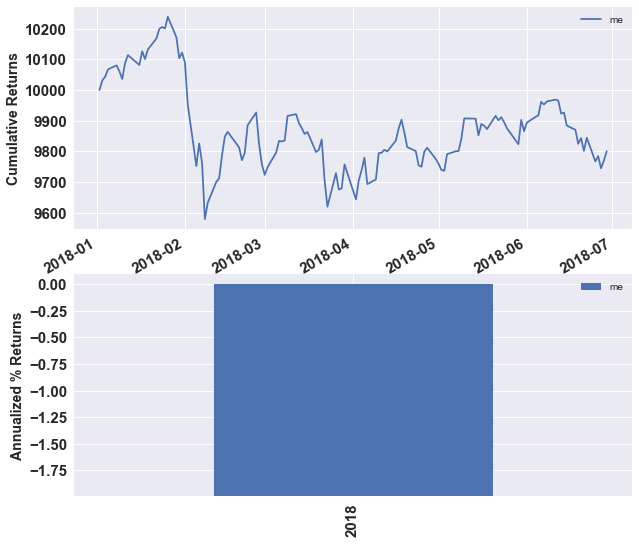

In [12]:
## Plot Cumulative And Annual Returns

py.figure(figsize=(10,10))
ax1=py.subplot(211)
py.hold('on')

rme[['Total','Cash']].sum(axis=1).plot(ax=ax1)

py.xticks(fontsize=15,fontweight='bold')
py.yticks(fontsize=15,fontweight='bold')
py.ylabel('Cumulative Returns',fontweight='bold',fontsize=14)
py.xlabel('')
py.legend(['me'],loc='best')

ax2=py.subplot(212)
Annual_Returns.plot(kind='bar',ax=ax2)
py.xticks(fontsize=15,fontweight='bold');
py.yticks(fontsize=15,fontweight='bold');
py.ylabel('Annualized % Returns',fontweight='bold',fontsize=14)


In [ ]:
## Print Risk Return Profile

py.figure(figsize=(10,5));
py.plot(All_Var,avg_annual_returns.values,'.',markersize=15)
py.xticks(fontweight='bold',fontsize=15)
py.yticks(fontweight='bold',fontsize=15)
py.xlabel('Portfolio-Variance',fontweight='bold',fontsize=15)
py.ylabel('Average Annual Returns',fontweight='bold',fontsize=15)

## Perfect straiht line!!!!! quite unusall 